# Outlier Detection algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
warnings.filterwarnings('ignore')

In [2]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Visualizing the Outliers 

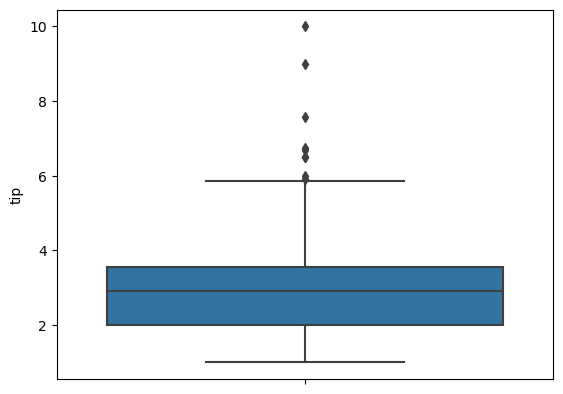

In [3]:
sns.boxplot(y=data.tip)
plt.show()

# Isolation Forest

#### Initialising the IsolationForest object

In [4]:
IF = IsolationForest()

In [5]:
IF.fit(data[['tip']])

IsolationForest()

In [6]:
data['IF'] = IF.predict(data[['tip']])

In [7]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,IF
0,16.99,1.01,Female,No,Sun,Dinner,2,-1
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1


* Note: The value -1 says that it is outlier

#### Initialising the EllipticEnvelop object

In [8]:
EE = EllipticEnvelope()

In [9]:
EE.fit(data[['tip']])

EllipticEnvelope()

In [10]:
data['EE'] = EE.predict(data[['tip']])

In [11]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,IF,EE
0,16.99,1.01,Female,No,Sun,Dinner,2,-1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1


### Local Outlier Factor

#### Initialising the LocalOtlierFactor object

In [12]:
LOF = LocalOutlierFactor(n_neighbors=5, novelty=True)

* We can adjust the sensitivity of the algorithm by specifying the neighbor points

In [13]:
LOF.fit(data[['tip']])

LocalOutlierFactor(n_neighbors=5, novelty=True)

In [14]:
data['LOF'] = LOF.predict(data[['tip']])

In [15]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,IF,EE,LOF
0,16.99,1.01,Female,No,Sun,Dinner,2,-1,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,1


#### Isolation Forest is really good for large datasets

* Lets remove the outliers using IF column and see the results

In [16]:
data_cleaned = data[data['IF']!=-1]

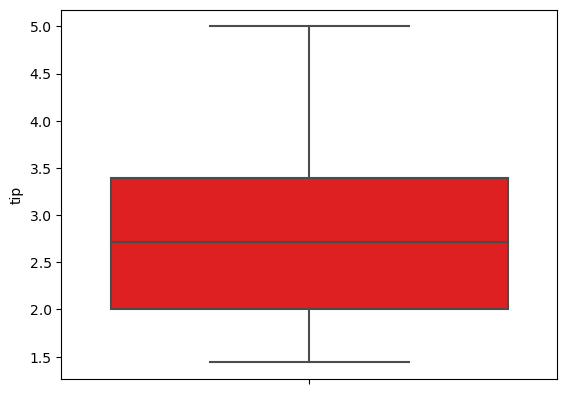

In [17]:
sns.boxplot(y=data_cleaned.tip, color='red')
plt.show()